In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [ ]:
data = pd.read_excel("/content/Online Retail.xlsx", sheet_name ='Online Retail')

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Exploring Data

In [ ]:
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Columns: 8 entries, InvoiceNo to Country
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
#Percentage of null values in all columns
data.isnull().sum()/len(data)*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [ ]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
data.value_counts("StockCode")

StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
84031b       1
84031a       1
82613a       1
20950        1
m            1
Length: 4070, dtype: int64

# Data Preprocessing

*Handling Null Values*






In [ ]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Exploring CustomerID Feature

In [ ]:
data.value_counts("CustomerID")

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
14119.0       1
13747.0       1
15590.0       1
15562.0       1
17925.0       1
Length: 4372, dtype: int64

In [ ]:
data[data['CustomerID'].isna()==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [ ]:
distinct_counts = data.groupby('InvoiceNo')['CustomerID'].nunique().reset_index()

In [ ]:
distinct_counts[distinct_counts['CustomerID']==0]

,InvoiceNo,CustomerID
43,536414,0
84,536544,0
85,536545,0
86,536546,0
87,536547,0
...,...,...
25661,C578097,0
25729,C579757,0
25769,C579907,0
25816,C580604,0


In [ ]:
distinct_counts[distinct_counts['CustomerID']>1]

,InvoiceNo,CustomerID


In [ ]:
data.groupby('InvoiceDate').agg({'InvoiceNo': 'unique', 'CustomerID': 'unique'}).reset_index()

,InvoiceDate,InvoiceNo,CustomerID
0,2010-12-01 08:26:00,[536365],[17850.0]
1,2010-12-01 08:28:00,[536366],[17850.0]
2,2010-12-01 08:34:00,"[536367, 536368]",[13047.0]
3,2010-12-01 08:35:00,[536369],[13047.0]
4,2010-12-01 08:45:00,[536370],[12583.0]
...,...,...,...
23255,2011-12-09 12:23:00,[581583],[13777.0]
23256,2011-12-09 12:25:00,[581584],[13777.0]
23257,2011-12-09 12:31:00,[581585],[15804.0]
23258,2011-12-09 12:49:00,[581586],[13113.0]


**Updating CustomerID Null values**

There are total 3710 unique invoices for which there is no CustomerID hence we cannot drop these rows as it will result in loss of lots of relevant data Hence I will replace it with some Customer ID based on Invoice Number.

*The replaced CustomerID will start with "RE"*

In [ ]:
#Missing values in the "CustomerID" column replaced based on the values within the same "InvoiceNo" group
data['CustomerID'] = data.groupby('InvoiceNo')['CustomerID'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [ ]:
data[data['CustomerID'].isna()==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


As we have explored above that there is no invoiceNo for which there are 2 distinct values of CustomerId Hence the count is still the same.

*So, we need to update the customerId with new values*

In [ ]:
invoices_with_empty_customer_id = data[data['CustomerID'].isna()]['InvoiceNo'].unique()

In [ ]:
#counting distinct invoice numbers having null customerID for replacing Null CustomerId with value
len(invoices_with_empty_customer_id)

3710

In [ ]:
new_customer_id = "RE0001"
customer_count = 1
invoice_customer_mapping = {}
for invoice_no in invoices_with_empty_customer_id:
  if(invoice_no not in invoice_customer_mapping):
    data.loc[data['InvoiceNo'] == invoice_no, 'CustomerID'] = new_customer_id
    invoice_customer_mapping[invoice_no] = new_customer_id
    customer_count += 1
    new_customer_id = "RE" + str(customer_count).rjust(4,"0")
  else:
    data.loc[data['InvoiceNo'] == invoice_no, 'CustomerID'] = invoice_customer_mapping[invoice_no]

In [ ]:
data[data['CustomerID'].isna()==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Handling Description Feature

In [ ]:
data[data['Description'].isna()==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,RE0001,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,RE0003,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,RE0004,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,RE0005,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,RE0006,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,RE3681,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,RE3685,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,RE3691,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,RE3699,United Kingdom


In [ ]:
stocks_with_empty_description = data[data['Description'].isna()]['StockCode'].unique()
len(stocks_with_empty_description)

960

In [ ]:
d_count = data.groupby('StockCode')['Description'].nunique().reset_index()

In [ ]:
d_count[d_count['Description']==0]

,StockCode,Description
5,10134,0
26,16053,0
80,20689,0
111,20738,0
159,20825,0
...,...,...
4046,DCGS0057,0
4047,DCGS0066P,0
4052,DCGS0071,0
4053,DCGS0072,0


In [ ]:
#Missing values in the "Description" column replaced based on the values within the same "StockCode" group
data['Description'] = data.groupby('StockCode')['Description'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [ ]:
data[data['Description'].isna()==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,RE0003,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,RE0006,United Kingdom
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,RE0007,United Kingdom
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,RE0008,United Kingdom
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,RE0010,United Kingdom
...,...,...,...,...,...,...,...,...
280754,561498,21610,NaN,-14,2011-07-27 14:10:00,0.0,RE2380,United Kingdom
281615,561555,37477B,NaN,-11,2011-07-28 10:21:00,0.0,RE2404,United Kingdom
281616,561557,37477C,NaN,-31,2011-07-28 10:21:00,0.0,RE2405,United Kingdom
346849,567207,35592T,NaN,4,2011-09-19 11:01:00,0.0,RE2754,United Kingdom


Still there are 112 rows having no description value

We can notice that most of these rows have unit price 0, hence they are contributing less to revenue so we can drop these rows

In [ ]:
data = data.dropna(subset=["Description"])

In [ ]:
data[data['Description'].isna()==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


*All the columns are in proper format hence no data type conversion is necessary*

# Statistical Analysis

**OUTLIER DETECTION USING IQR**

Since retail datasets can often have skewed distributions due to varying sales patterns, the IQR method can be effective to detect outliers.

In [ ]:
data.describe()

,Quantity,UnitPrice
count,541797.000000,541797.000000
mean,9.555919,4.612067
std,218.103428,96.769831
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [36]:
data.shape

(541797, 8)

In [44]:
quantity_q1 = data['Quantity'].quantile(0.25)
quantity_q3 = data['Quantity'].quantile(0.75)
quantity_iqr = quantity_q3 - quantity_q1

quant_lower_range = quantity_q1 - 3 * quantity_iqr
quant_upper_range = quantity_q3 + 3 * quantity_iqr
print(quant_lower_range)
print(quant_upper_range)


-26.0
37.0


In [45]:
price_q1 = data['UnitPrice'].quantile(0.25)
price_q3 = data['UnitPrice'].quantile(0.75)
price_iqr = price_q3 - price_q1

price_lower_range = price_q1 - 3 * price_iqr
price_upper_range = price_q3 + 3 * price_iqr
print(price_lower_range)
print(price_upper_range)

-7.390000000000001
12.77


In [46]:
data[(data['Quantity']>quant_lower_range) & (data['Quantity']<=quant_upper_range)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Total 21973 Outliers in Quantity field

In [48]:
data[(data['UnitPrice']>price_lower_range) & (data['UnitPrice']<=price_upper_range)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Total 12850 Outliers in price column

***But It is obvious that products having low prices have high quantity purchases. So Outliers should be filtered based on an AND condition between these two columns***

In [53]:
data = data[(data['UnitPrice']>price_lower_range) & (data['UnitPrice']<=price_upper_range) & (data['Quantity']>quant_lower_range) & (data['Quantity']<=quant_upper_range)]

***There are total 34804 Outliers in the dataset***

In [55]:
data.describe()

,Quantity,UnitPrice
count,506993.000000,506993.000000
mean,6.133544,2.985603
std,7.165860,2.586978
min,-25.000000,0.000000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,37.000000,12.750000


**RELATIONS BETWEEN DIFFERENT COLUMNS**

*Using correlation Coefficient*

In [54]:
correlation_matrix = data.corr()
print(correlation_matrix)

           Quantity  UnitPrice
Quantity   1.000000  -0.313106
UnitPrice -0.313106   1.000000


<ipython-input-54-e02734b85495>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


`It shows that there is a perfect negative correlation, but it is more close to 0 as compare to -1 hence there is a slighlty weak relationship between these two.`

# Data Visualization

In [74]:
products_count = data.groupby('StockCode')['InvoiceNo'].nunique().reset_index()
products_count

,StockCode,InvoiceNo
0,10002,67
1,10080,22
2,10120,29
3,10125,83
4,10133,181
...,...,...
3891,S,7
3892,gift_0001_10,9
3893,gift_0001_20,1
3894,gift_0001_30,1


In [83]:
data.value_counts('Quantity')

Quantity
 1     139481
 2      79915
 12     61039
 6      40696
 4      38013
        ...  
-13        29
-23        23
-22        21
-17        19
-19        19
Length: 62, dtype: int64

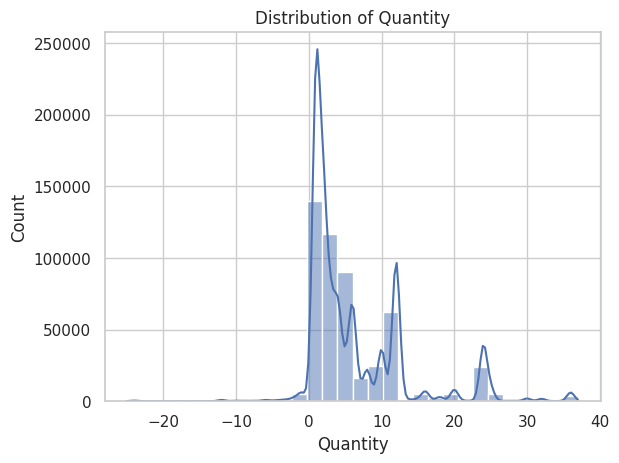

In [85]:
sns.histplot(data['Quantity'], bins=30, kde=True)
plt.title('Distribution of Quantity')
plt.show()

<ipython-input-86-31afa9a2c835>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.resample('M').sum()['Quantity'].plot()


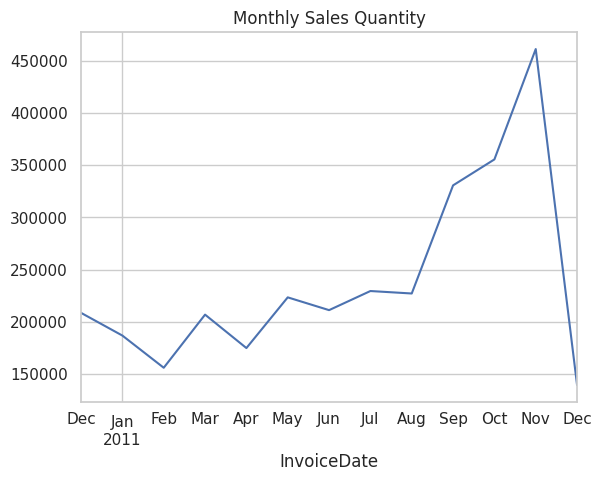

In [86]:
#Time Series Analysis
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data.set_index('InvoiceDate', inplace=True)
data.resample('M').sum()['Quantity'].plot()
plt.title('Monthly Sales Quantity')
plt.show()

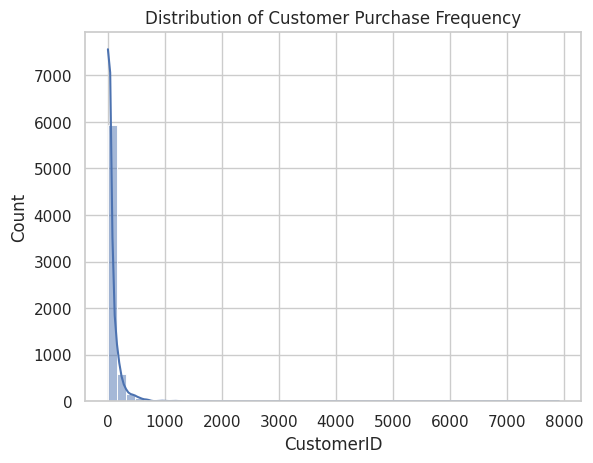

In [94]:
# Customers Analysis

customer_counts = data['CustomerID'].value_counts()
sns.histplot(customer_counts, bins=50, kde=True)
plt.title('Distribution of Customer Purchase Frequency')
plt.show()